# Modeling and Simulation in Python

Jason's attempt at implementing the HIV model (with no explicit dt).

Copyright 2018 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [2]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [11]:
def update_func(state, t, system):
    """Update the HIV model.
    
    state: State(R, L, E, V)
    t: time
    system: System object
    
    returns: State(R, L, E, V)
    """
    unpack(system)
    R, L, E, V = state

    dRdt = Gamma*tau - mu*R - beta*R*V
    dLdt = rho*beta*R*V - mu*L - alpha*L
    dEdt = (1-rho)*beta*R*V + alpha*L - delta*E
    dVdt = pi*E - sigma*V
    
    R += dRdt
    L += dLdt
    E += dEdt
    V += dVdt
    
    return State(R=R, L=L, E=E, V=V)

In [17]:
init = State(R=1000, L=0, E=0, V=4e-7)

,values
R,1.000000e+03
L,0.000000e+00
E,0.000000e+00
V,4.000000e-07


In [18]:
system = System(Gamma=1.36,
                mu=1.36e-3,
                tau=0.2,
                beta=0.00027,
                rho=0.1,
                alpha=3.6e-2,
                sigma=2,
                delta=0.33,
                pi=100,
                t0=0,
                t_end=120)

,values
Gamma,1.36000
mu,0.00136
tau,0.20000
beta,0.00027
rho,0.10000
alpha,0.03600
sigma,2.00000
delta,0.33000
pi,100.00000
t0,0.00000


In [19]:
update_func(init, 0, system)

,values
R,9.989120e+02
L,1.080000e-08
E,9.720000e-08
V,-4.000000e-07


In [20]:
results = run_simulation(system, update_func)
results.head()

/Users/cwoodard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/Users/cwoodard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in double_scalars
  
/Users/cwoodard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/cwoodard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/cwoodard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/Users/cwoodard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/Users/cwoodard/anaconda3/lib/python3.6/site-pack

,R,L,E,V
0.0,1000.000000,0.000000e+00,0.000000e+00,4.000000e-07
1.0,998.912000,1.080000e-08,9.720000e-08,-4.000000e-07
2.0,997.825480,-3.917376e-10,-3.158145e-08,1.012000e-05
3.0,996.740434,2.722687e-07,2.432639e-06,-1.327814e-05
4.0,995.656871,-9.524455e-08,-1.576402e-06,2.565420e-04


/Users/cwoodard/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:1910: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


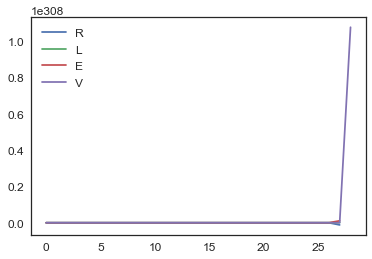

In [21]:
results.plot()